# Entrega 4 - Clustering y Redes Neuronales

### Grupo 21:
     - Lucía Bouza  C.I 42897970



## 1. Problema 1

El objetivo de este problema es mejorar el manejo y la interpretación de los datos, adoptando las herramientas disponibles relacionadas a visualización y clustering. También Se pide aplicar el algoritmo de KNN, y sacar conclusiones al comparar con la clusterización. 

### 1.1 Parte A
    
#### 1.1.1 Caracterísiticas del Dataset

El conjunto de datos Ideology Data consta de información obtenida de un estudio de las elecciones nacionales de Estados Unidos de 2012. En el dataset se detallan 6 características de entrada y una clasificación que indica la autoidentificación ideológica del encuestado. 

El dataset cuenta con 5916 registros. Existen un total de 985 valores de atributos sin información (2,4%). Si quisiéramos entender mejor los valores faltantes, podemos ver la información del archivo sub-data.txt, donde todos los atributos categóricos fueron transformados a numéricos. En particular, para los valores faltantes se tienen valores negativos, cada uno de ellos indicando una explicación del valor faltante. Por ejemplo, hay casos donde el valor faltante se da porque el encuestado se niega a contestar, otros en los que no sabe la respuesta, otros con acceso restringido, etc. En el documento sub-cbdk.txt se explica cada uno de los valores numéricos a qué hacen referencia.

Para realizar el profiling y mostrar la información inicial, decidimos utilizar el excel ya que resulta más visual tener los nombres reales de los atributos y categorías. Luego, realizaremos el profiling y continuaremos trabajando con el archivo sub-data.txt para darle un vistazo en mayor profundidad a los valores faltantes y ya tener las categorías con valores numéricos. 

La distribución de la clase objetivo se puede ver gráficamente en el reporte de Profiling, siendo los números:
 * clase Moderate: 1830
 * clase Conservarive: 1001
 * clase Slightly Conservarive:789
 * clase Slightly liberal: 641
 * clase liberal: 638
 * clase extremely conservative: 208
 * clase extremely liberal:195
 * valores faltantes: 614

los atributos de entrada son los siguientes, pudiendo tomar los siguientes valores considerados válidos:

* Case_ID: atributo numérico que identifica la tupla. es único.
* Race: White, Black, Hispanic, Other
* Religion: Religious, Not Religious
* Income: atributo numérico que va de 1 a 28.
* Education:Some College, High School, Bachelor's, Graduate Degree, Less than H.S
* Age_group: 17-20, 21-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75+


Ejecutemos la función de pandas Data profiling para obtener más datos acerca de los atributos, su distribución, valores, relaciones, etc. 

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
from sklearn import model_selection
from Metodos import preprocesamiento, RelacionesAtributoConIdeologia, Relaciones2AtributosConIdeologia, PreprocesamientoPCA, PCA_impl, KNN, K_Means, CantidadClustersOptima

#Carga de Datos
datasetConCategorias = pd.read_excel('./Data/ideologyData.xls', index_col=0)
dataset = pd.read_csv('./Data/sub-data.txt', sep=',')

#generación de informe
pandas_profiling.ProfileReport(datasetConCategorias).to_widgets() 
pandas_profiling.ProfileReport(dataset).to_widgets() 

    
#### 1.1.2 Análisis del dataset

Analizando los atributos, observamos que falta la clasificación de ideología para el 10.4% de las tuplas. 

Al observar las relaciones entre los atributos, vemos que la característica más relacionada a la ideología es la religión seguida por la raza. los ingresos, educación y edad se correlacionan en menor medida. Otro dato interesante, es que la mayor correlación de atributos se da entre educación e ingresos. 

Analizando el segundo reporte, notamos que en gran medida los valores faltantes de las características demográficas (representados en el dataset con valores negativos) se deben a que los entrevistados se reúsan a contestar, y también algunos casos en donde que no saben responder. Cuando se les consulta por su ideología, el 90% de los valores faltantes se deben a que los entrevistados no han reflexionado mucho sobre el tema. 

Con respecto a la clase objetivo, el 31% se considera moderados, siguiendo por un 17% de conservadores, un 13% con tendencia a los conservadores, 10% con tendencia a los liberales, 10% de liberales y luego los extremistas de ambos partidos, con 3% aproximado cada uno. Realizando una observación rápida, puede verse que la población entrevistada  se encuentra en el centro, con tendencia a los conservadores. 

#### 1.1.3 Preporcesamiento de datos

Para trabajar con los datos, es necesario realizar primero un preprocesamiento de éstos. En este caso, queremos determinar que hacer con los valores faltantes (representados con valores negativos en dataset). definimos 3 opciones:
* opción 1 = borro todas las tuplas con valores faltantes
* opción 2 = borro las tuplas con valores faltantes en la clase objetivo y al resto le pongo la media de la clase
* opción 3 = A todas las celdas con valores faltantes le coloco el valor de la media de la clase

Para la observación de las relaciones, consideramos que es mejor no tener en cuenta las tuplas con valores faltantes, ya que si colocamos valores medios en las celdas que no cuentan con datos podemos llegar a sacar conclusiones erróneas. 

Para la generación de clusters puede interesar no perder tantas tuplas y colocar valores medios en las clases. Podemos utilizar tanto la opción 2 o 3, considerando que  si usamos la opción 3, para la visualización de la ideología sobre las instancias hay 10% de celdas estimadas.

Para la estimación de la clase objetivo con KNN, consideramos que para este caso, con la cantidad de instancias que tenemos, no es buena idea colocar la media en las celdas faltantes de la clase objetivo. Es por eso que nos parece mejor la opción 2. 


In [2]:
#preprocesamiento
# opción 1 = borro todas las tuplas con valores faltantes
# opción 2 = borro las tuplas con valores faltantes en la clase objetivo y al resto le pongo la media de la clase
# opción 3 = A todas las celdas con valores faltantes le coloco el valor de la media de la clase
Opción= 1
preprocesamiento(dataset, Opción)

### 1.2 Parte B

A continuación se mostrará como se distribuyen las instancias según su identificación ideológica. Se graficará la distribución con cada atributo (salvo Case_ID) y luego con combinaciones de a dos variables.

Para mostrar las relaciones se utilizan los boxenplot. Este tipo de gráfico se obtienen con la función catplot y la opción kind="boxen". Luego de varias pruebas y toparnos con problemas a la hora de graficar los datos y poder interpretarlos, llegamos a los boxenplots. 

iniciamos utilizando Pairplot, función que grafica en una grilla las relaciones entre las variables del dataset. Esta opción podría haber sido fantástica si las variables tuviesen valores continuos, y no discretos. El problema es que los puntos quedan superpuestos y no tenemos información sobre la cantidad de puntos de cada categoría que hay en un mismo lugar del gráfico. 
Se probó entonces con scatterPlot y el parámetro size, que agrupa instancias y las grafica con diferente tamaño, pero teníamos el mismo problema de superposición. 
Para solucionar el problema de la superposición se pensó agregar ruido a cada una de las instancias para que no quedaran graficadas en el mismo lugar. La idea fue descartada porque parecía muy rebuscada, hasta que nos topamos con caterplot, que hace exactamente eso con el la opción Jitter (que por defecto viene activada). Se probó entonces caterplot de tipo swarm, pero la gran cantidad de instancias y categorías de la clase objetivo hacía que el dibujo no fuese claro. Así llegamos a los boxplots, que graficaban básicamente lo que se deseaba. Con un último tirón de investigación, nos quedamos con los boxenplots, que son muy similares, pero muestran más información sobre la forma de la distribución.

En las la visualización de las relaciones, se puede elegir ver todos los gráficos o solo los más relevantes. Por defecto pusimos la variable en True, pero si se desea ver todos los gráficos de las diferentes combinaciones de atributos, basta con ponerlo en False. 

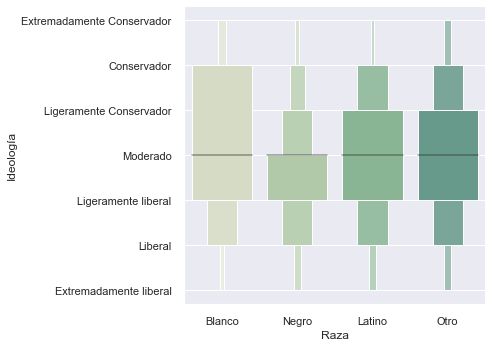

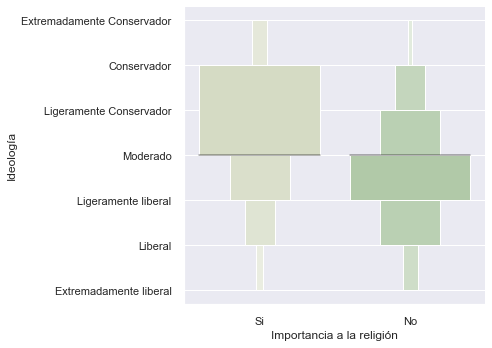

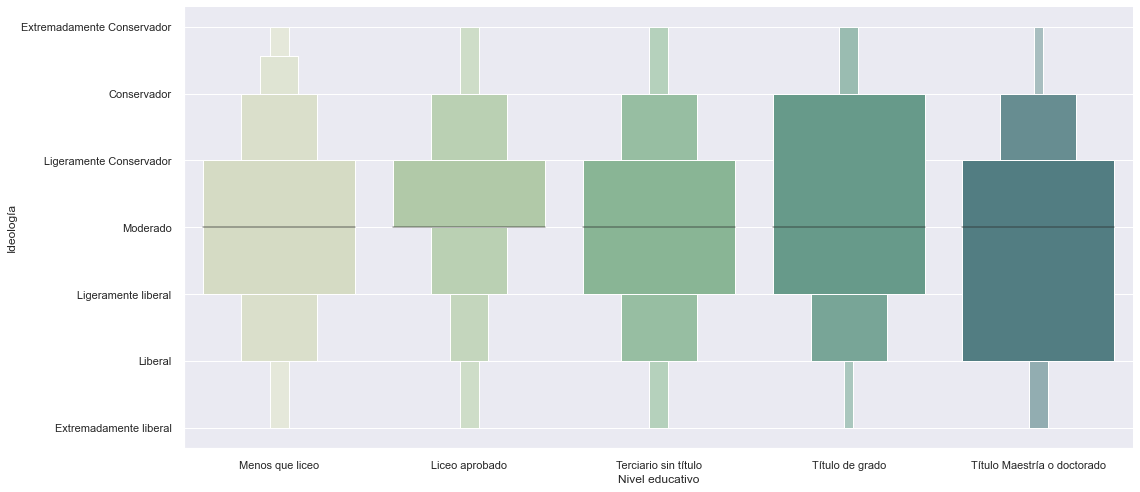

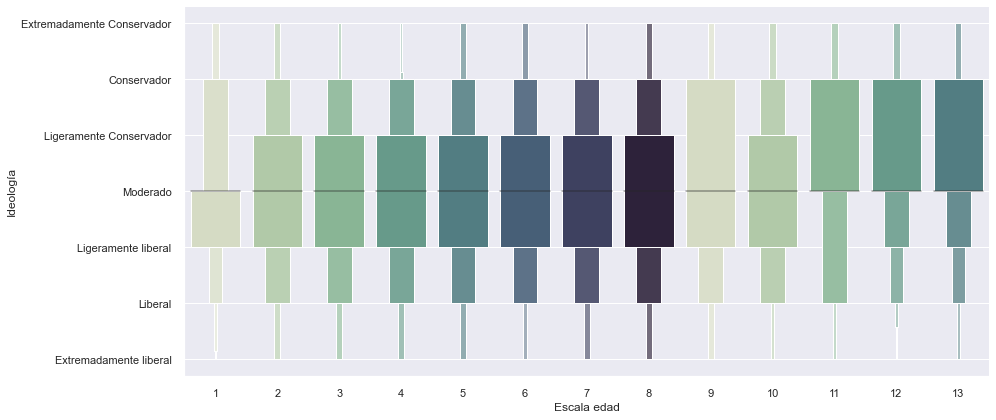

In [3]:
'relaciones de las variables con la clase objetivo'
soloRelevantes = True
RelacionesAtributoConIdeologia(dataset, soloRelevantes)

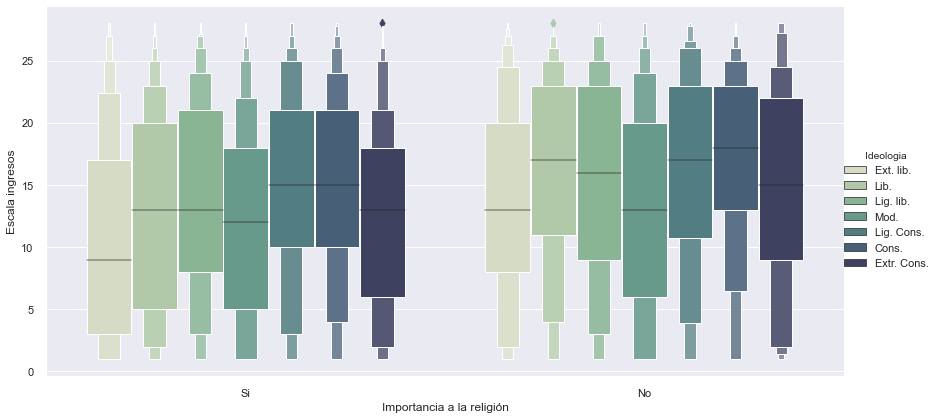

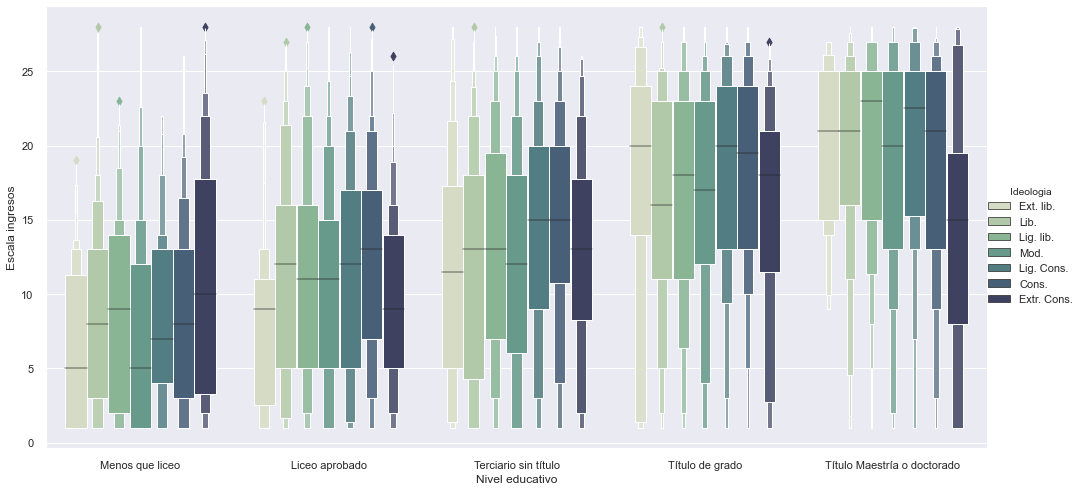

In [10]:
'relaciones entre 2 Atributos y la clase objetivo'
soloRelevantes = True
Relaciones2AtributosConIdeologia(dataset, soloRelevantes)

**Interpretación**

de acuerdo a los gráficos, podemos decir que las personas de raza blanca son las tienen mayor tendencia al conservadurismo. Las personas de raza negra tienden en menor medida hacia el liberalismo, y los hispanos junto al resto de las razas, se encuentran en mayor medida en una posición de centro.

A las personas que consideran la religión parte importante de su vida tienden a ser más conservadores de los que no le dan un papel tan preponderante. 

Cuando hablamos de educación, quienes tienen más estudios tienen sesgo hacia el liberalismo. Otro dato interesante de este gráfico, es que quienes tienen menos estudios tienen más casos de personas que se consideran extremistas conservadores. 

Con respecto al gráfico de distribución de edad, los más jóvenes de la encuesta, aquellos menores a 20 años, son el sector más liberal, mientras que los mayores a 65 tienden al conservadurismo. El resto de los sectores tienen una distribución muy similar, siendo más densa en ideologías de centro. 

Si hablamos de ingresos, no hay una relación clara con la ideología. 

Veamos ahora las gráficas que contemplan relaciones entre 2 variables y la clase objetivo.

Observando la que relaciona Educación, ingresos e ideología, vemos que a mayor educación, mayor ingreso, independientemente de la ideología. Algo interesante que se observa, es que para los de menor educación, los extremistas liberales tienen menores ingresos, siendo los extremistas conservadores los que tienen mayores ingresos. En el caso de los que tienen más estudios, se da que los extremistas conservadores tienen en general menores ingresos que el resto. Observando el gráfico que relaciona religión, ingresos e ideología, vemos que para todas las posiciones políticas, a quienes les interesa menos la religión tienen mayores ingresos.

Más allá de las relaciones descritas, para ningún atributo o relación de ellos se ve una conclusión clara, o una tendencia definida para con la clase objetivo. Se observan si ciertas relaciones puntuales, pero no hay una correlación fuerte entre las variables. Tal como mostró el data profiling, la mayor correlación con la ideologīa se da con la importancia de la religión, seguido por la raza. 

### 1.3 Parte C

A continuación se realizará el análisis de los componentes principales (PCA) en dos dimensiones. Luego se ejecutará k-means sobre dichos componentes para encontrar los posibles clusters. 

**PCA**

PCA es muy útil tanto para visualización de datos como para acelerar la ejecución de algoritmos de aprendizaje automático. El método se centra en disminuir las dimensiones quedándose con la mayor cantidad de información posible en las nuevas dimensiones. 
Para poder aplicarlo es importante que los datos se encuentren estandarizados. Para ello utilizamos la función 
*StandardScaler* de Scikit-learn, que lleva los datos a la media 0 y varianza 1.  
Luego calculamos con el método de Scikit-learn *pca* los componentes principales. debemos indicarle la cantidad de componentes que deseamos, y luego sobre que conjunto de datos los calcularemos. Nosotros calcularemos los componentes principales de todo el dataset sin la clase objetivo. luego, se crea un nuevo dataset con los dos componentes y la clase objetivo. 

**K-means**

Con nuestro nuevo dataset, que consta de 2 componentes principales y la clase objetivo, calculamos los clusters, indicando la cantidad que deseemos. Utilizaremos para ello la función de Scikit-learn *k-means*. Ajustaremos nuestro modelo a los componentes principales, y con el parámetro k-means++ le indicaremos que calcule los centroides iniciales de manera inteligente para acelerar la convergencia. Dado que el algoritmo puede caer en mínimos locales, se aconseja correrlo varias veces con diferentes centroides. Por defecto el Algoritmo de scikit-learn lo realiza 10 veces, y así lo correremos nosotros. 

También graficaremos la inercia de los clusters en relación a la cantidad de clusters para obtener la cantidad óptima de éstos. Usaremos el llamado método del codo para determinar cual es la mejor cantidad de clusters. 


In [5]:
#preprocesamiento
# opción 1 = borro todas las tuplas con valores faltantes
# opción 2 = borro las tuplas con valores faltantes en la clase objetivo y al resto le pongo la media de la clase
# opción 3 = A todas las celdas con valores faltantes le coloco el valor de la media de la clase
Opción= 2
dataset = pd.read_csv('./Data/sub-data.txt', sep=',')
preprocesamiento(dataset, Opción)

Porcentaje información de cada componente: [9.99980544e-01 1.62511665e-05]


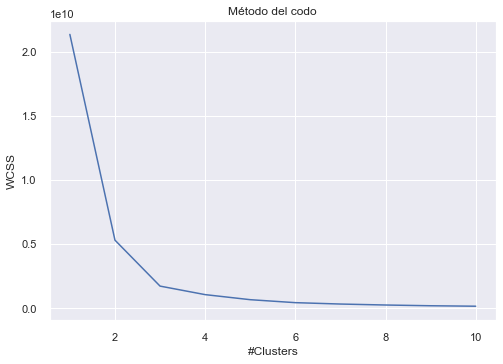

In [6]:
'PCA' 
target = 'LIBCPRE_SELF'
PreprocesamientoPCA(dataset)
ComponentesPrincipales = PCA_impl(dataset, target)

'Cálculo Cantidad óptima de clusters'
CantidadClustersOptima(ComponentesPrincipales)

De acuerdo a la información obtenida, el componente 1 tiene el 99,99% de la información. 
Con la gráfica, se observa que la cantidad óptima de clusters sería 3, por el método del codo.

A continuación calcularemos k-means con 3 clusters y graficaremos los clusters y los valores de la clase objetivo para compararlos.

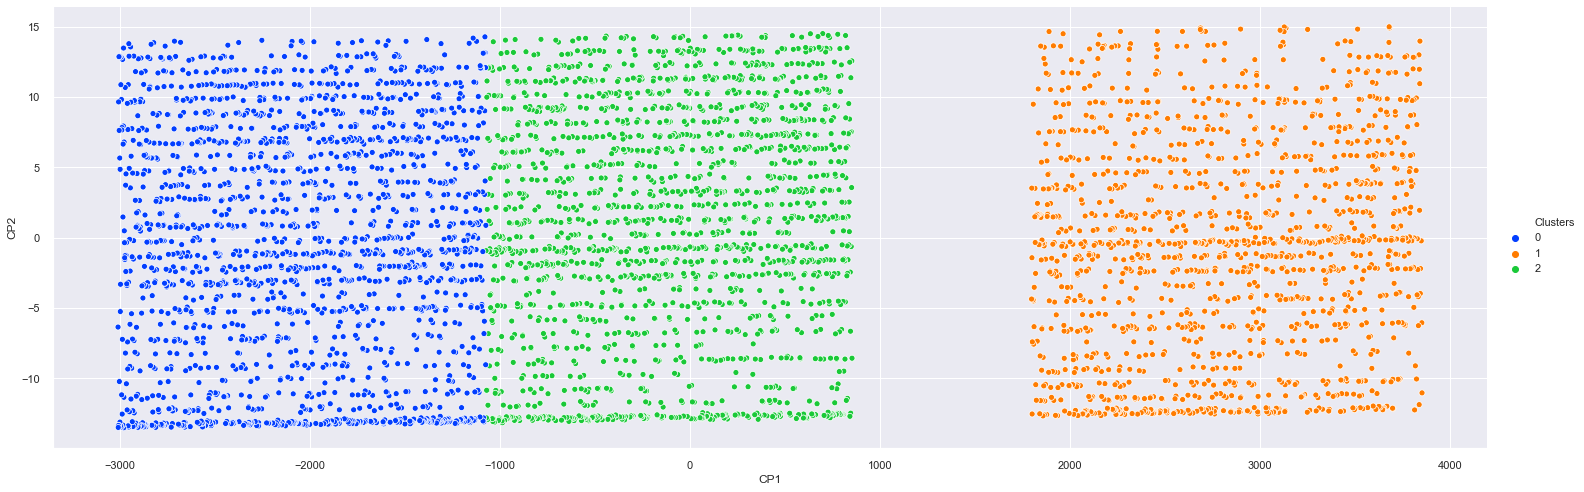

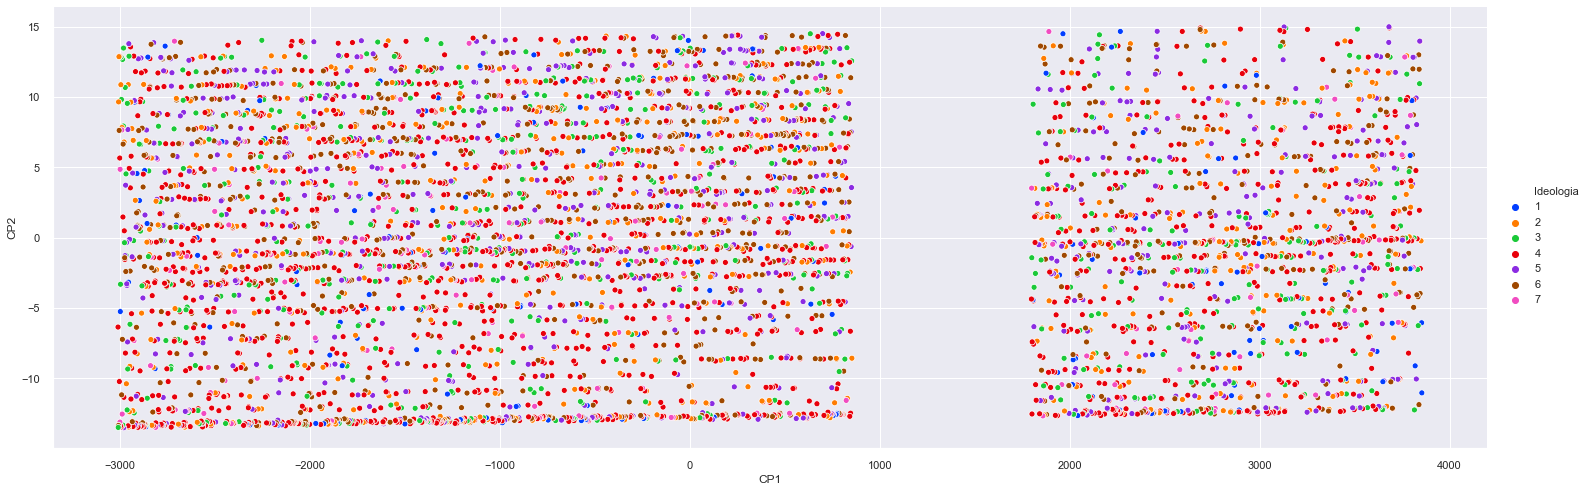

In [7]:
clusters = 3
arrayClusters = K_Means(ComponentesPrincipales, clusters)

sns.set()

'visualización Clusters en dataset'
ComponentesPrincipales['Clusters'] = arrayClusters
sns.relplot(x="CP1", y="CP2", hue="Clusters", palette='bright', data=ComponentesPrincipales, height=7, aspect=3)

'visualización datos reales ideología en dataset'
ComponentesPrincipales['Ideologia'] = dataset[target].values
sns.relplot(x="CP1", y="CP2", hue='Ideologia', palette='bright', data=ComponentesPrincipales, height=7, aspect=3)

**Interpretación**

En la primer gráfica se observan los clusters definidos por k-means, donde hay 2 claros. Al solicitarle al algoritmo que encontrara 3 clusters, éste divide el mayor en 2 clusters diferentes.  

En el segundo gráfico se observa la distribución de la clase objetivo para el dataset. Vemos que las diferentes ideologías no se agrupan en ningún tipo de cluster, en particular tampoco en los definidos por k-means. 

### 1.4 Parte D

En esta sección intentaremos predecir la ideología a partir de los atributos, con K-nearest neighbors. Utilizaremos el algoritmo ya implementado de Scikit-learn, con distancia euclídea, algoritmo para cálculo de vecinos auto (al estar en 'auto', utiliza el algoritmo que mejor se adapta a los datos) y diferentes k.

El algoritmo KNN es un algoritmo de tipo Lazy que no necesita entrenar, pero si deben haber instancias etiquetadas para poder estimar nuevas instancias. Es por eso que utilizaremos conjuntos de datos de entrenamiento, validación y testeo.

Luego, se graficarán las predicciones de KNN sobre el dataset que contiene los dos componentes principales del conjunto de test (en el archivo EjecuciónProblema1.py se pueden ver los resultados sobre el conjunto de validación). También se graficarán sobre el mismo dataset los valores de la clase objetivo para así poder visualmente interpretar el acierto de KNN. Por último, se mostrará graficamente los puntos las instancias acertadas y erradas por el algoritmo.


              precision    recall  f1-score   support

           1       0.05      0.03      0.03        39
           2       0.10      0.10      0.10       128
           3       0.13      0.11      0.12       128
           4       0.37      0.60      0.46       366
           5       0.16      0.08      0.10       158
           6       0.14      0.09      0.11       200
           7       0.00      0.00      0.00        42

    accuracy                           0.26      1061
   macro avg       0.13      0.14      0.13      1061
weighted avg       0.21      0.26      0.22      1061

Porcentaje información de cada componente: [9.99979720e-01 1.70713833e-05]


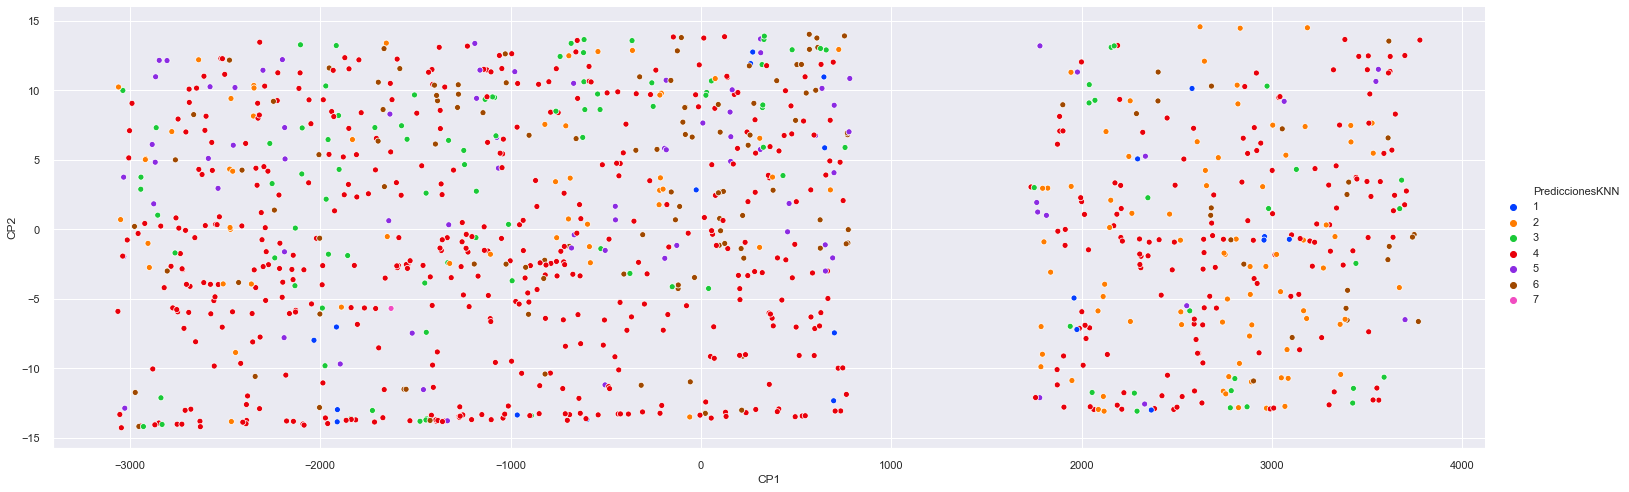

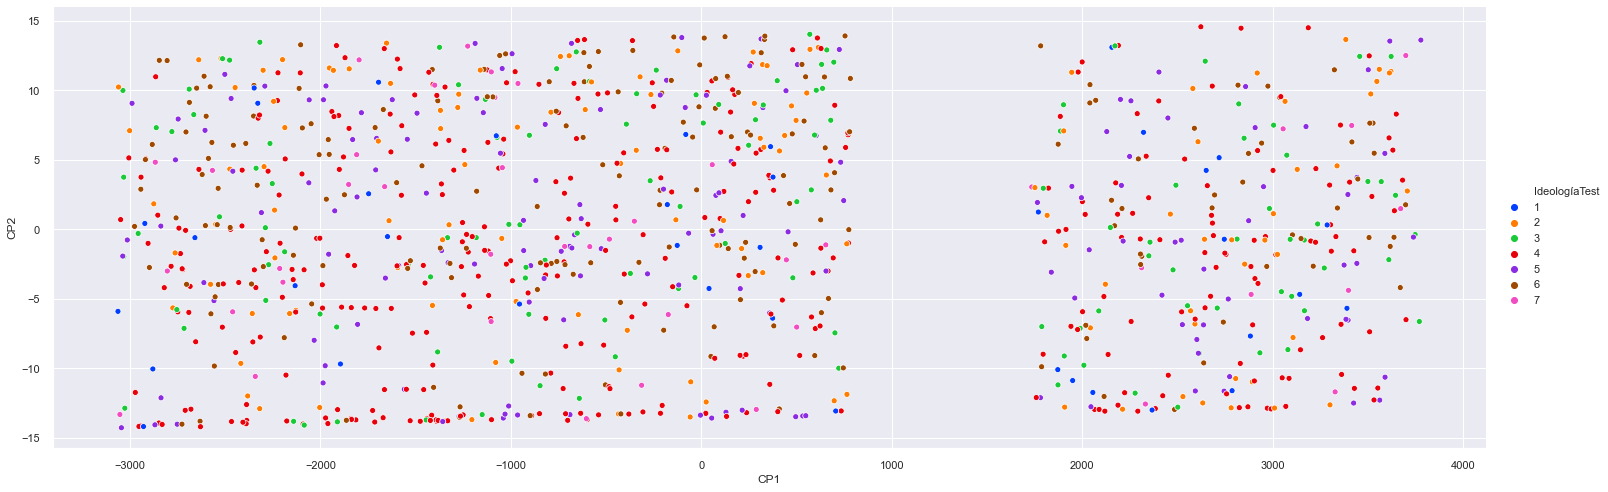

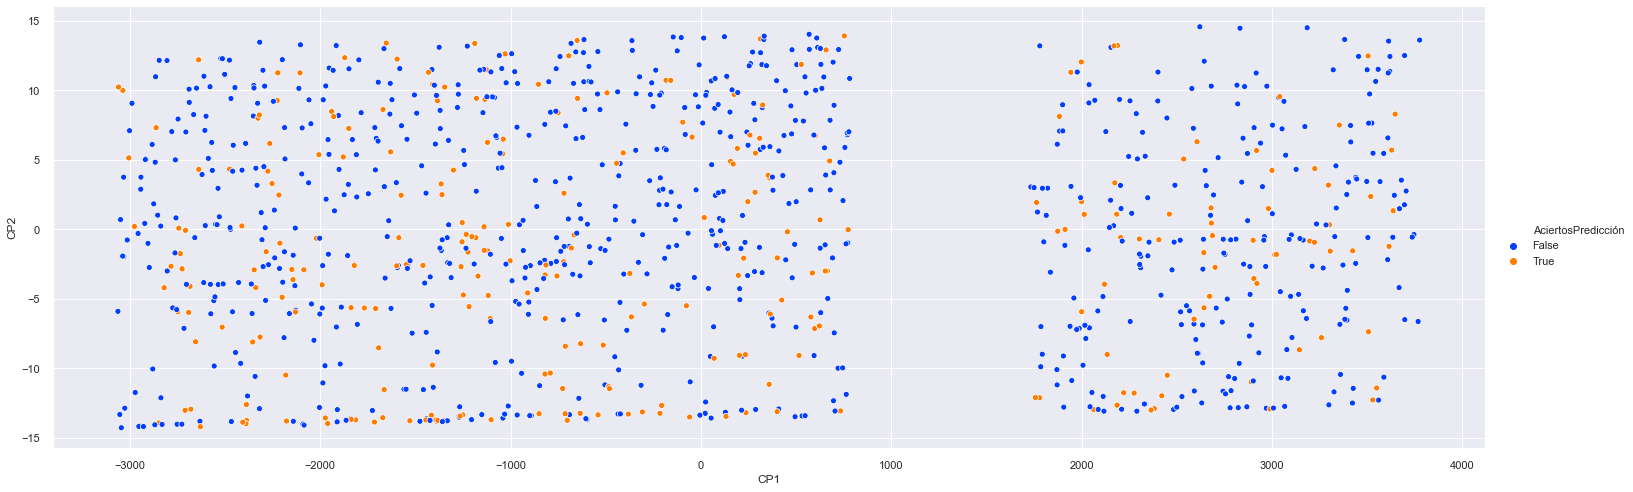

In [8]:
'separación conjuntos'
ConjuntoAux, test = model_selection.train_test_split(dataset, stratify=dataset['LIBCPRE_SELF'], test_size=0.2)
entrenamiento, validacion = model_selection.train_test_split(ConjuntoAux, stratify=ConjuntoAux['LIBCPRE_SELF'], test_size=0.2)

'KNN'
k = 8
arrayPrediccion = KNN(entrenamiento, test, target, k)

arrayAciertos = arrayPrediccion==test[target]

ComponentesPrincipalesTest = PCA_impl(test, target)

'visualización predicciones KNN de test'
ComponentesPrincipalesTest['PrediccionesKNN'] = arrayPrediccion
sns.relplot(x="CP1", y="CP2", hue='PrediccionesKNN', palette='bright', data=ComponentesPrincipalesTest, height=7, aspect=3)

'visualización datos reales de test'
ComponentesPrincipalesTest['IdeologíaTest'] = test[target].values
sns.relplot(x="CP1", y="CP2", hue='IdeologíaTest', palette='bright', data=ComponentesPrincipalesTest, height=7, aspect=3)

'visualización aciertos'
ComponentesPrincipalesTest['AciertosPredicción'] = arrayAciertos.values
sns.relplot(x="CP1", y="CP2", hue='AciertosPredicción', palette='bright', data=ComponentesPrincipalesTest, height=7, aspect=3)

**Interpretación**

Como se pudo ver en la parte C, no se observan aquí tampoco ningún tipo de cluster ni en las predicciones, ni el la clase objetivo y tampoco en los aciertos del algoritmo. En general, se obtienen mejores resultados de aciertos en las clases con mayor cantidad de instancias, como la clase 4.

Luego de haber hecho el Profiling del dataset, intentado encontrar clusters y aplicado  un algoritmo de clasificación para poder predecir, podemos decir que no hemos tenido mucha suerte. No se observan relaciones en los datos que se correlacionen con la clase objetivo. Tampoco se detectan clusters en las características demográficas que puedan ayudarnos a sacar conclusiones interesantes, y estos clusters no coinciden con la clase objetivo. Por otro lado, no se encuentran patrones que ayuden en la clasificación de nuevas instancias. 

Podemos decir que los métodos de aprendizaje automático son buenos, siempre y cuando los datos también lo sean. En este dataset no hay tendencias claras, por lo que aplicar un método para aprender a predecir nuevas instancias nos llevará indudablemente a estimar de mala forma.



## 2. Problema 2

El objetivo de este problema consta en realizar una primera aproximación a las redes neuronales, en particular a través de su aplicación para generar texto con redes neuronales recurrentes. La idea es la reproducción, interpretación y pruebas de un caso de estudio presentado por Andrej Karpathy.

### 2.1 Parte A

En esta sección se pide reproducir el trabajo descrito en el blog de Andrej Karpathy sobre las redes neuronales recurrentes para la generación de texto carácter a carácter. Se pide ejecutar la implementación de Francesca Paulin publicada en Kaggle.com.

Para la ejecución se prueba en la laptop local y también en la plataforma Google Colab. En esta última, se puede elegir correr el notebook en GPU, cambiando el runtime type, el cual acelera notablemente la ejecución del entrenamiento. Se probó correrlo sobre CPU en Google Colab, y los tiempos de entrenamiento fueron mayores. 

Para tener una primera aproximación de la ejecución, se disminuyó la cantidad de épocas de entrenamiento, teniendo resultados de generación de texto bastante malos. Sobre este punto Hablaremos más detenidamente en la parte D.

### 2.2  Parte B

Las RNN son un tipo de redes neuronales donde las entradas de las capas están constituidas por la salida de las capas anteriores así como por la salida de la capa en cuestión, en el instante anterior. Dado que parte de la entrada de una capa es la salida de instantes anteriores, se dice que las neuronas tienen memoria. Gracias a esta memoria es que este tipo de redes son buenas para manejar secuencias de datos, ya que para ciertos problemas para poder predecir es necesario tener la entrada actual y también información sobre entradas anteriores. Nuestro caso de estudio es exactamente esto lo que requiere, ya que para predecir el siguiente carácter, no le basta saber el carácter actual, sino también la secuencia de caracteres anteriores. Las LSTM (Long-Short Term Memory), usadas en la implementación de la parte A, son una extensión de las RNN, y pueden recordar información por mayor tiempo.

**Modelo**

El modelo que se utiliza es el char-RNN. El modelo consiste en dar como entrada a la red una cadena de caracteres y que ésta dé las probabilidades de cada carácter de ser el siguiente. Llamando repetidamente a este proceso, podemos generar texto. 


**Pre procesamiento de Datos**

En primer lugar se toma un texto de entrada para entrenar a la red, Se lo pasa a valores numéricos (ya que éstas son las entradas aceptadas de la red) y luego se aplica one-hot-encoding por carácter del array de entrada. 

Luego, para el entrenamiento se crean paquetes con secuencias de tamaño fijo de caracteres, entrada y objetivo (recordar que la los valores objetivo son un shift de 1 de la entrada). 

**Arquitectura del Modelo**

El modelo consta de 3 capas: 
* una capa LSTM, donde se pueden definir tamaño de la entrada, la cantidad de capas de recurrencia, cantidad de neuronas por capa, si deseamos una capa de dropout (explicaremos en el siguiente punto a que se refiere) al final de cada capa de recurrencia, y si los inputs son secuencias. 
* una capa de Dropout. Las capas de Dropout ignoran a las neuronas con una probabilidad p, en el proceso de pasaje de valores para adelante o atrás. Sirven para evitar el sobreajuste de la red. Tanto en las capas de Dropout de LTSM como en esta se está utilizando p=0.5, por lo que podrían no estar considerándose la mitad de las neuronas. 
* una capa Fully Connected, donde se puede definir la cantidad de neuronas, y el tamaño de la entrada y salida.

El modelo planteado en el ejemplo de implementación consta de los siguientes parámetros:
* (lstm): LSTM(89, 512, num_layers=4, batch_first=True, dropout=0.5)
* (dropout): Dropout(p=0.5)
* (fc): Linear(in_features=512, out_features=89, bias=True)

**Entrenamiento del modelo**

En el entrenamiento podemos definir la cantidad de épocas, la tasa de aprendizaje, el tamaño del batch, el largo de la cadena de las secuencias incluidas en los batch, el porcentaje de secuencias que sean para validación. También podemos definir el valor del parámetro clip, usado para prevenir los gradientes explosivos (valores altos de los pesos). 

Se utiliza el optimizador de Adam y la función de pérdida Entropy Loss. 

**Predicción de texto con el modelo**

Para la predicción, se definen 2 funciones. En la primera, la red predice el siguiente carácter, de acuerdo a las probabilidades de salida aplicando una softmax a la salida de la red. En la función Sample, llamamos a la primer función repetidas veces, y así generamos texto. la explicación de los parámetros la veremos en la parte C.

### 2.3 Parte C

Para esta sección se elige entrenar al modelo con los siete libros de Harry Potter en inglés, por 70 épocas. El archivo de texto consta de 7 MB.
Probaremos la generación de texto modificando los siguientes parámetros de sampleo:

**size:** cantidad de caracteres a estimar.

**prime:** Cadena de caracteres desde la cual luego la red comienza a estimar nuevos caracteres. Este parámetro es necesario para que la red comience a predecir desde un punto conocido y 'válido', y no de forma random. 

**top_k:** Al estimar el siguiente carácter, utilizamos este parámetro para indicarle que considere los K más probables, y luego de entre éstos, elegir uno considerando las probabilidades pero agregando también un poco de azar. De esta manera, nuestra predicción no llegará a elegir caracteres totalmente absurdos para la secuencia, sino que elegirá de entre los más posibles, agregando también un poco de ruido. 

Los resultados son los siguientes:

**sample(net, 1000, prime='Harry ', top_k=5)**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./samples/1000-Harry-5.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>

**sample(net, 1000, prime='Harry ', top_k=20)**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./samples/1000-Harry-20.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>


**sample(net, 1000, prime='The ', top_k=5)**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./samples/1000-the-5.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>



**sample(net, 1000, prime='Howarts ', top_k=5)**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./samples/1000-Howarts-5.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>



**sample(net, 500, prime='', top_k=10)**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./samples/500-NULL-10.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>

De los textos generados observamos que el modelo aprende de forma asombrosa el lenguaje inglés. La gran mayoría de las palabras se encuentran bien escritas, sin errores gramaticales. Aprende cabezales de las páginas de los libros, posiciones de la coma, abrir y cerrar comillas, incluso luego de bastantes palabras. Los textos generados en si no tienen mucho sentido, pero si observamos frases cortas, podemos ver que muchas de ellas tienen coherencia. Los textos generados, más allá del sentido que tengan, tienen algo de J.R Rowling... los diálogos, la escritura en tercera persona y pasado (pero no en los diálogos).

Para el caso cuando utilizamos como Prime "Harry", en los casos presentados se ve que comienza la producción de texto con el formato del cabezal de las páginas. Suponemos que sucede así porque esa secuencia se repite mucho en el corpus de entrenamiento. Cuando no utilizamos Prime, la primer palabra es una sin sentido, porque no tiene desde donde partir para generar texto, aunque vemos que rápidamente se recompone. 

No vemos mayores diferencias en el cambio de los top_k. Quizá, pero caso como una apreciación personal, el texto parece ser más rico cuando el k es mayor, aunque comete más errores gramaticales. 

### 2.4 Parte D

Se realizan modificaciones en la función de entrenamiento para poder graficar la pérdida en función de las épocas de entrenamiento, y las de validación. Las líneas agregadas se encuentran en el archivo train.py adjunto en los archivos entregados (lineas: 33, 39, 63, 94-96, 105-120). Se ejecuta en la plataforma Google Colab. Aquí se muestra una imagen de los gráficos obtenidos. 

El error disminuye tanto en el conjunto de entrenamiento como en el de validación, a medida que se avanza en el entrenamiento. Es posible que los parámetros que se estén aprendiendo estén sobreajustando al conjunto de validación. 

En el caso que se esté sobreajustando mucho, los textos generados debieran ser muy buenos, con mucho sentido, y muy parecidos a algún pasaje de los libros. Es decir, que el modelo esté recordando el corpus de entrenamiento y no tenga capacidad de generalización. No vemos que eso ocurra, al menos con 70 épocas. 



<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./Graficos/graficaEpocasLoss70.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>


# 2.4 Parte E

Se muestran a continuación ejemplos de texto generado con diferentes épocas, para la predicción tomando en cuenta los siguientes parámetros de sampleo: (net, 500, prime='The ', top_k=10)

**Cantidad de épocas 0:**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./TextoporEpocas/Epoca0.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>

Podemos observar que en la primer época, no puede generar texto con sentido, sino que son simplemente caracteres. Aún le falta mucho por aprender.

**Cantidad de épocas 7:**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./TextoporEpocas/Epoca7.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>

Ya en la época 7, genera palabras correctas y abre y cierra comillas. Tiene faltas de ortografía y las frases que genera no tienen sentido. Si tomamos secuencias de palabras de a 3, podríamos decir que tienen cierto sentido algunas de ellas. Tenemos una diferencia sustancial con la época 0.  

**Cantidad de épocas 41:**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./TextoporEpocas/Epoca41.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>

En esta porción de texto podemos ver que aprendió los pies de página, abre y cierra comillas para sentencias más largas que las generadas en la época 7. Las frases tienen más sentido y las faltas de ortografía casi desaparecieron. 


**Cantidad de épocas 68:**

<div>
<div style="clear: left;">
<p style="float: left;"> <img src="./TextoporEpocas/Epoca68.png" width="500"/>
<div style="clear: left;">
</div>
</div>
</div>

No se observan grandes diferencias con lo generado en la época 41. El texto tiene alguna falta de ortografía, pero aún las frases generadas no tienen gran sentido. Si se observan palabras más ricas que en las épocas anteriores. También el uso de mayúsculas, comas, apóstrofes de forma correcta. 
